In [1]:
# %pip install pandas-datareader

In [2]:
# !pip install yfinance --upgrade --no-cache-dir

In [3]:
%autosave 30

Autosaving every 30 seconds


In [4]:
from pandas_datareader import data as pdr
# import pandas_datareader.data as pdweb
import yfinance as yf
yf.pdr_override()

import pandas as pd
from datetime import datetime
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
tsla = pdr.get_data_yahoo('TSLA')
tsla

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...
2023-01-09 00:00:00-05:00,118.959999,123.519997,117.110001,119.769997,119.769997,190284000
2023-01-10 00:00:00-05:00,121.070000,122.760002,114.919998,118.849998,118.849998,167642500
2023-01-11 00:00:00-05:00,122.089996,125.949997,120.510002,123.220001,123.220001,183810800


In [6]:
## Keep only dates in "Date" feature

tsla = tsla.reset_index()
tsla.Date = pd.to_datetime(pd.to_datetime(tsla.Date).dt.date)
print(tsla.Date.dtype)
tsla.set_index("Date", inplace=True)
tsla.head()

datetime64[ns]


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [7]:
tsla.reset_index().dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

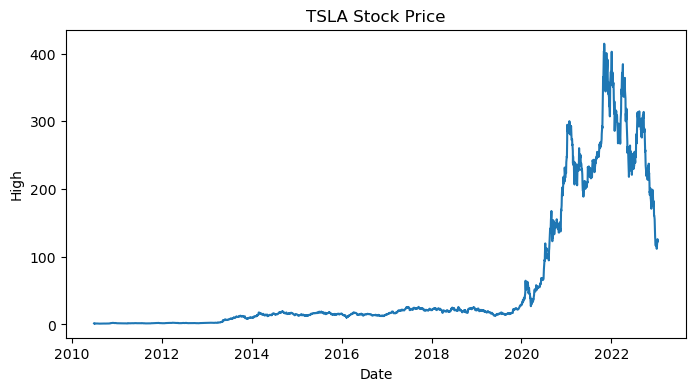

In [8]:
## Plot the "High" feature

plt.figure(figsize=(8, 4))
plt.plot(tsla.High)
plt.xlabel("Date")
plt.ylabel("High")
plt.title("TSLA Stock Price")
plt.show()

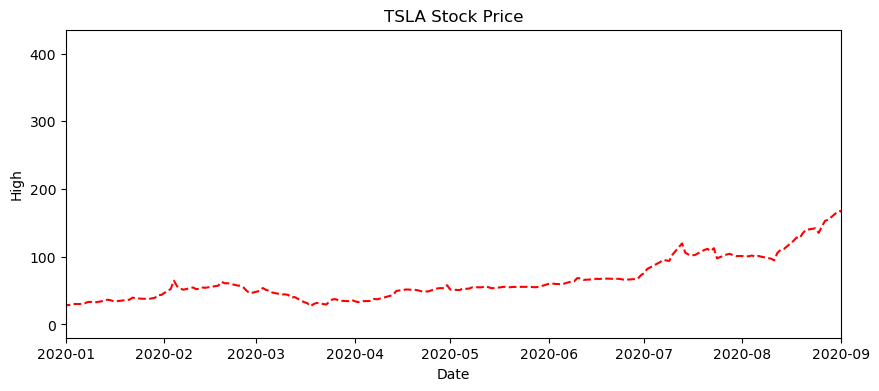

In [9]:
## Plot within a desired limit

plt.figure(figsize=(10, 4))
sns.lineplot(x=tsla.index, y=tsla.High, color="red", linestyle="--")
plt.xlim([date(2020, 1, 1), date(2020, 9, 1)])
plt.title("TSLA Stock Price")
plt.show()

In [10]:
## Certain part of the dataset

idx = tsla.loc[date(2020, 1, 1): date(2021, 9, 1)].index
share_open = tsla.loc[date(2020, 1, 1): date(2021, 9, 1)]['Open']

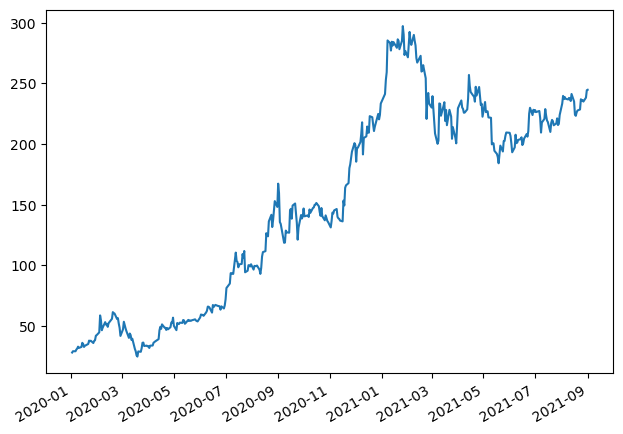

In [11]:
fig, ax = plt.subplots()
plt.tight_layout()
fig.autofmt_xdate()  # prevents overlapping
ax.plot(idx, share_open)

## # Time Resampling:

**https://towardsdatascience.com/resample-function-of-pandas-79b17ec82a78**

In [12]:
tsla.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


### "A": Year End Frequency

In [13]:
## Resampling the data in regard to `rule A`

tsla.resample(rule='A').max()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-12-31,2.391333,2.428000,2.316667,2.364667,2.364667,281494500
2011-12-31,2.308667,2.333333,2.268667,2.329333,2.329333,172767000
2012-12-31,2.546000,2.663333,2.474000,2.534000,2.534000,85206000
2013-12-31,12.930667,12.966667,12.558000,12.891333,12.891333,557458500
2014-12-31,19.177999,19.427999,18.693333,19.069332,19.069332,490225500
2015-12-31,18.680000,19.110001,18.420000,18.817333,18.817333,234744000
2016-12-31,17.763332,17.955999,16.967333,17.694668,17.694668,356136000
2017-12-31,25.779333,25.974001,25.290001,25.666668,25.666668,296871000
2018-12-31,25.000000,25.830667,24.474667,25.304667,25.304667,504745500


<AxesSubplot:xlabel='Date'>

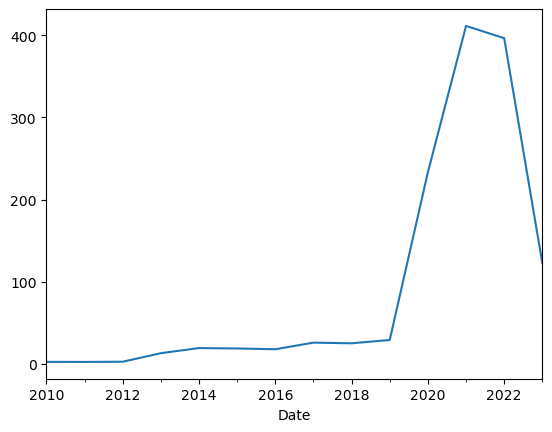

In [14]:
## Plot the resampled data

tsla.resample(rule='A').max()['Open'].plot()

### "QS": Quarter Start Frequency

<AxesSubplot:xlabel='Date'>

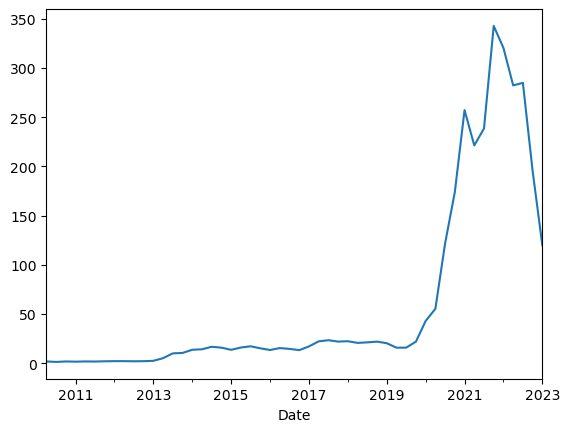

In [15]:
tsla.resample("QS").mean()['High'].plot()

### "BA": Business End Frequency

<AxesSubplot:xlabel='Date'>

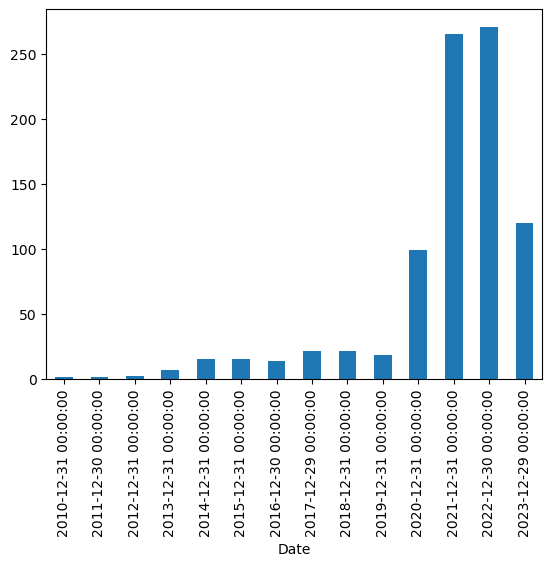

In [16]:
tsla.resample("BA").mean()["High"].plot(kind='bar')

### "M": Calendar Month End

<AxesSubplot:xlabel='Date'>

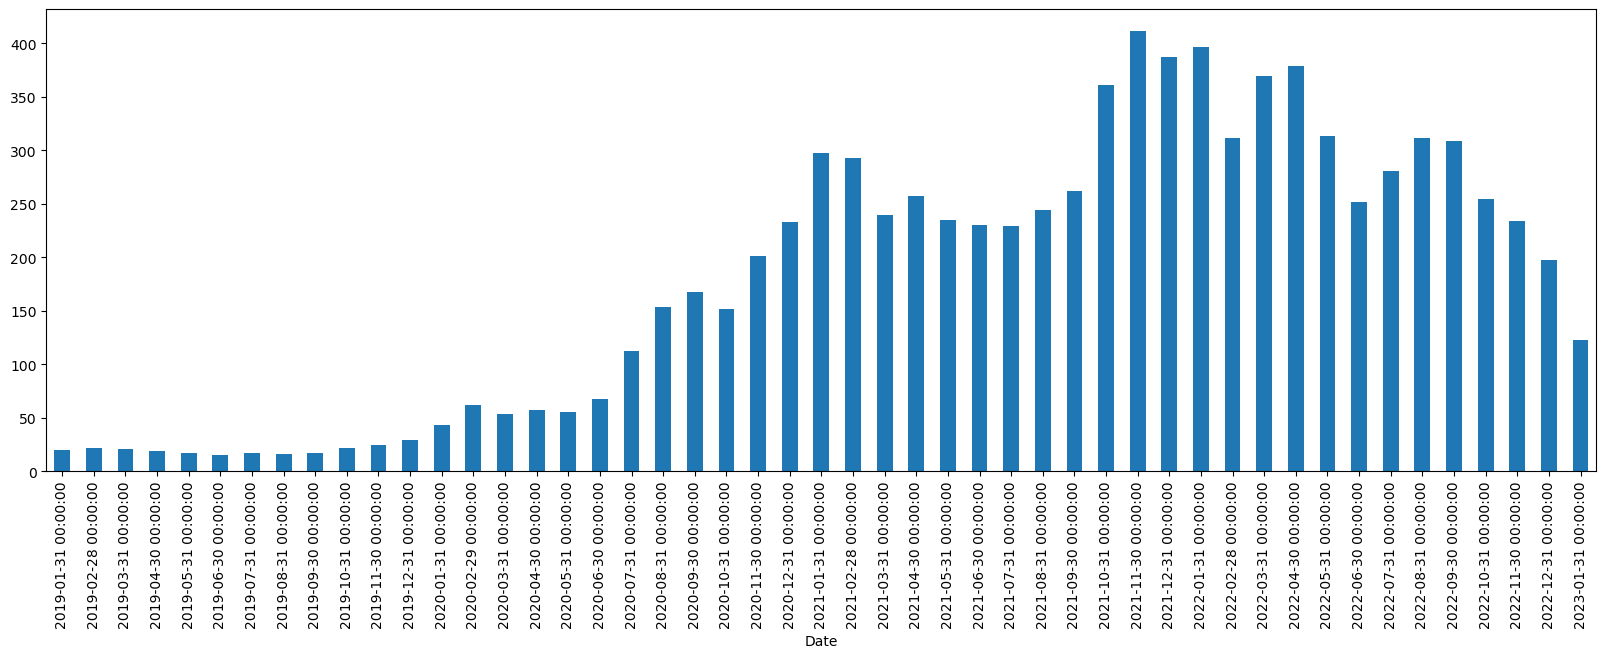

In [17]:
tsla.tail(1000).resample("M").max()['Open'].plot(kind='bar', figsize=(20, 6))

## # Rolling:

A **`Rolling`** average continuously updates the average of a data set to include all the data in the set until that point. 

For example, the rolling average of return quantities at March 2012 would be calculated by adding the return quantities in January, February, and March, and then dividing that sum by three.

### Why Rolling?

To get a smoothened version of the given curve.

In [18]:
## Rolling down by 10 records

tsla['High'].rolling(10).mean().head(15)

Date
2010-06-29         NaN
2010-06-30         NaN
2010-07-01         NaN
2010-07-02         NaN
2010-07-06         NaN
2010-07-07         NaN
2010-07-08         NaN
2010-07-09         NaN
2010-07-12         NaN
2010-07-13    1.421333
2010-07-14    1.389000
2010-07-15    1.329533
2010-07-16    1.298733
2010-07-19    1.293067
2010-07-20    1.305400
Name: High, dtype: float64

In [19]:
## Creating a '30 days rolling' "Open" feauture

tsla['Open: 30 days Rolling'] = tsla['Open'].rolling(30).mean()
tsla.head(35)

,Open,High,Low,Close,Adj Close,Volume,Open: 30 days Rolling
Date,,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,NaN
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,NaN
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,NaN
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,NaN
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500,NaN
2010-07-07,1.093333,1.108667,0.998667,1.053333,1.053333,103825500,NaN
2010-07-08,1.076000,1.168000,1.038000,1.164000,1.164000,115671000,NaN
2010-07-09,1.172000,1.193333,1.103333,1.160000,1.160000,60759000,NaN
2010-07-12,1.196667,1.204667,1.133333,1.136667,1.136667,33037500,NaN


<AxesSubplot:xlabel='Date'>

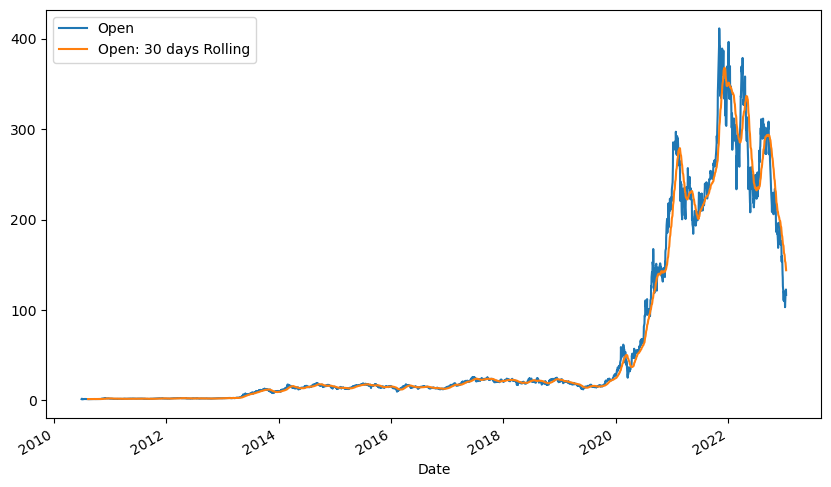

In [20]:
## Plotting the rolling feature against the original

tsla[['Open', 'Open: 30 days Rolling']].plot(figsize=(10, 6))

### # Mini-task:

1. Load the Microsoft Data using Pandas Data reader.
2. Get the maximum price of the share from 2017 to 2022.
3. Date of the highest price of the stock out of all these 5 years?
4. Date of the lowest price of the stock out of all these 5 years?

In [21]:
## 1. Load MSFT stock data

msft = pdr.get_data_yahoo('MSFT')
msft

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1986-03-13 00:00:00-05:00,0.088542,0.101563,0.088542,0.097222,0.060809,1031788800
1986-03-14 00:00:00-05:00,0.097222,0.102431,0.097222,0.100694,0.062980,308160000
1986-03-17 00:00:00-05:00,0.100694,0.103299,0.100694,0.102431,0.064067,133171200
1986-03-18 00:00:00-05:00,0.102431,0.103299,0.098958,0.099826,0.062437,67766400
1986-03-19 00:00:00-05:00,0.099826,0.100694,0.097222,0.098090,0.061351,47894400
...,...,...,...,...,...,...
2023-01-09 00:00:00-05:00,226.449997,231.240005,226.410004,227.119995,227.119995,27369800
2023-01-10 00:00:00-05:00,227.759995,231.309998,227.330002,228.850006,228.850006,27033900
2023-01-11 00:00:00-05:00,231.289993,235.949997,231.110001,235.770004,235.770004,28669300


In [22]:
msft.reset_index().dtypes

Date         datetime64[ns, America/New_York]
Open                                  float64
High                                  float64
Low                                   float64
Close                                 float64
Adj Close                             float64
Volume                                  int64
dtype: object

In [23]:
# Keep only the date in "Date" feature

msft.reset_index(inplace=True)
msft.Date = pd.to_datetime(pd.to_datetime(msft.Date).dt.date)
msft.set_index("Date", inplace=True)
msft.reset_index().dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

<AxesSubplot:title={'center':'MSFT Stock'}, xlabel='Date', ylabel='Open'>

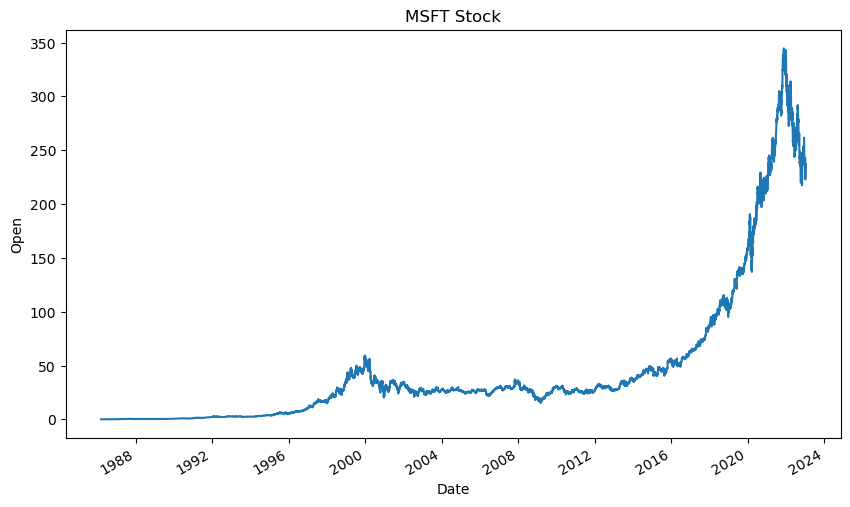

In [24]:
msft['Open'].plot(figsize=(10, 6), xlabel='Date', ylabel='Open', title='MSFT Stock')

In [25]:
## 2. Maximum price of share from 2017 to 2022

msft.resample('A').max()['Open'].loc["2017-12-31":"2022-12-31"]

Date
2017-12-31     87.120003
2018-12-31    115.419998
2019-12-31    159.449997
2020-12-31    229.270004
2021-12-31    344.619995
2022-12-31    335.350006
Freq: A-DEC, Name: Open, dtype: float64

In [26]:
## 3. Date of the highest price of the share from 2017 to 2022

# filter records from 2017 to 2022
msft_17_22 = msft[(msft.index.year>=2017) & (msft.index.year<=2022)]

# Date of highest price of the share
msft_17_22.idxmax()['Open']

Timestamp('2021-11-22 00:00:00')

In [27]:
## 3. Date of the lowest price of the share from 2017 to 2022

msft_17_22.idxmin()['Open']

Timestamp('2017-01-05 00:00:00')